In [ ]:
EXPLORATORY DATA ANALYSIS

In [1]:
#Import the pandas module
import pandas as pd

In [3]:
#Load the dataset into a dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

Plot the distribution curve for the column ConvertedComp

In [5]:
#Import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns


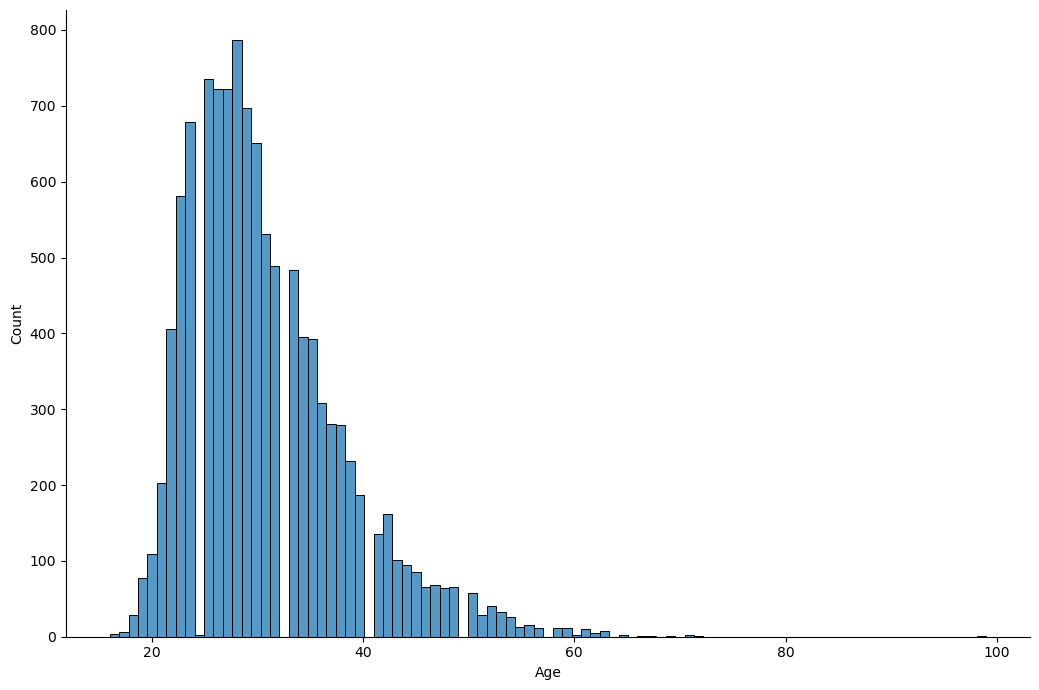

In [41]:
#Plot the distribution curve for the column 'ConvertedComp'
sns.displot(df['Age'], height=7, aspect = 1.5)

Plot histogram for the column 'ConvertedComp'

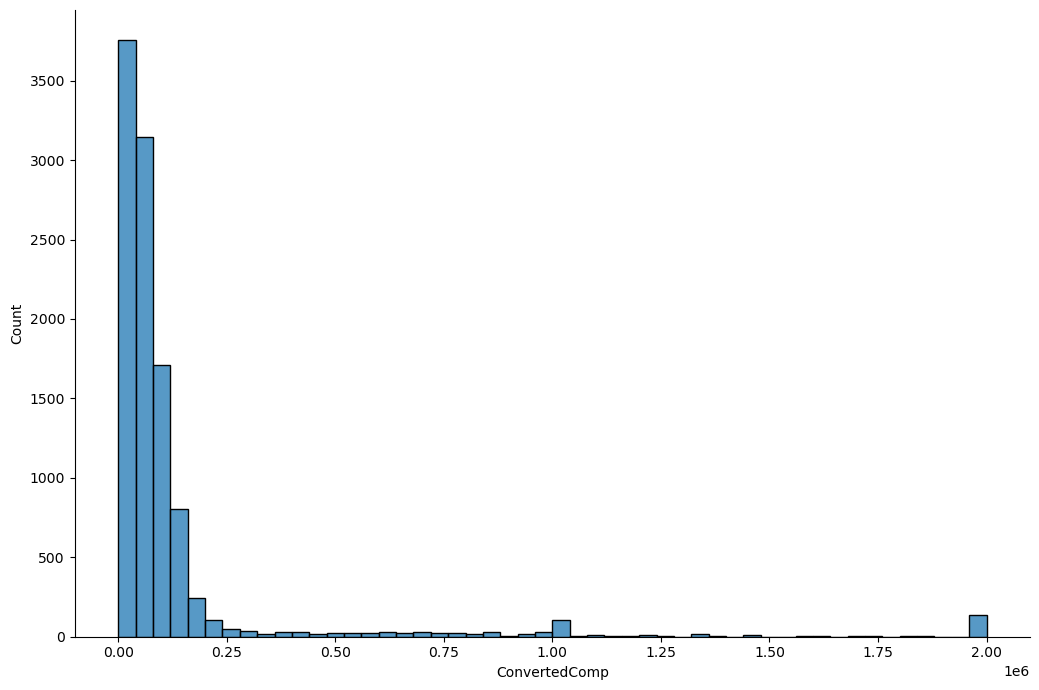

In [45]:
#Plot histogram for the column 'ConvertedComp'
sns.displot(df['ConvertedComp'],bins=50, height=7, aspect = 1.5)

In [21]:
#Median of the column ConvertedComp
df['ConvertedComp'].median()

57745.0

In [23]:
#Responders identified themselves only as a Man
df["Gender"].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [25]:
print((df['Gender'].eq('Man').sum()), 'respondents')

10480 respondents


In [33]:
df[df['Gender'].eq('Woman')]['ConvertedComp'].median()

57708.0

In [35]:
#min,q1,median,q3,max of a column are its five number summary
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

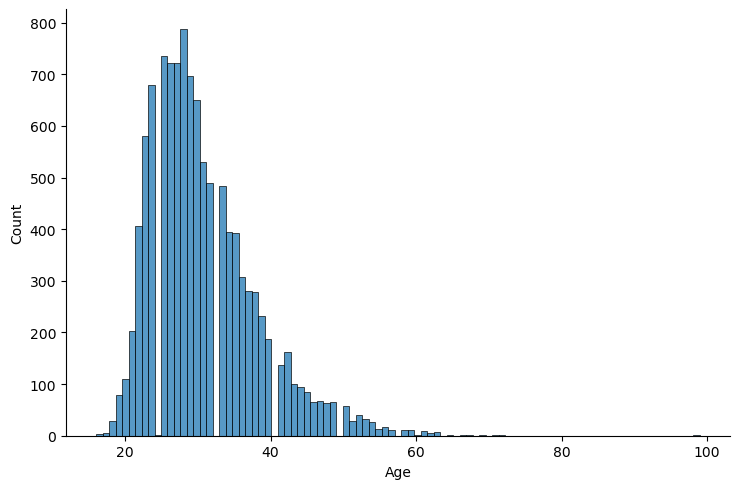

In [39]:
#Plot a histogram of the column Age
sns.displot(df['Age'], height=5, aspect = 1.5)

We find out if outliers exist in the column ConvertedComp using a box plot

<Axes: xlabel='ConvertedComp'>

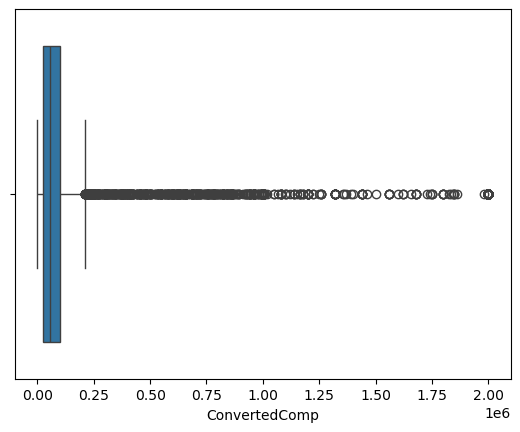

In [47]:
sns.boxplot(data=df['ConvertedComp'], orient = 'h')

We can find out the Inter Quartile Range for the column ConvertedComp

In [49]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

print('Q1', q1)
print('Q3', q3)

IQR = q3 - q1
print('IQR', IQR)

Q1 26868.0
Q3 100000.0
IQR 73132.0


We find out the upper and lower bounds.

In [51]:
up_bound = q3 + IQR*1.5
print('Upper bound:', up_bound)

lw_bound = q1 - IQR*1.5
print('Lower bound:', lw_bound)

Upper bound: 209698.0
Lower bound: -82830.0


With these calculations we are able to identify how many outliers are there in the ConvertedComp column.

In [53]:
num_outliers = 0

for conv_comp in df['ConvertedComp']:
    if (conv_comp < lw_bound) or (conv_comp > up_bound):
        num_outliers = num_outliers + 1

num_outliers

879

We now can create a new dataframe by removing the outliers from the ConvertedComp column.

In [55]:
outl_index = df[(df.ConvertedComp < lw_bound) | (df.ConvertedComp > up_bound)].index

df_outl = df.drop(outl_index)
df_outl.shape

(10519, 85)

In [57]:
df_outl.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10519.000000,9.710000e+03,9703.000000,10402.000000,8277.000000,10250.000000
mean,12488.961023,7.243963e+05,59883.208389,41.895813,4.809352,30.647298
std,7235.797316,7.184433e+06,43394.336755,24.301665,4.636411,7.352928
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6257.500000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12483.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18789.500000,1.150000e+05,85574.500000,43.000000,5.000000,34.000000
max,25142.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


In [71]:
df_outl['ConvertedComp'].quantile(0.5)

52704.0

FINDING CORRELATION

We can find the correlation between Age and all other numerical columns.

In [65]:
# Filter for numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlations
correlation_with_age = numeric_df.corr()['Age']
print(correlation_with_age)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [67]:
df['Age'].median()

29.0